In [ ]:
# Analyse différentille hhv8 :
# install :
%pip install pandas
%pip install matplotlib seaborn
%pip install scikit-learn
%pip install scipy
%pip install seaborn
#jupyter nbconvert --to html benchmarking_2tools_test.ipynb

In [9]:
import os
import pandas as pd

# count_featurecounts
count_dir = "./count_featurecounts"
output_matrix = "./count_featurecounts/gene_count_matrix_featurecounts.csv"


files = [f for f in os.listdir(count_dir) if f.endswith("_counts.txt")]
dfs = []

for file in files:
    sample_name = file.replace("_not_hg38_counts.txt", "")
    path = os.path.join(count_dir, file)
    
    df = pd.read_csv(path, sep='\t', skiprows=1)
    
    df = df[['Geneid', df.columns[-1]]] 
    df.columns = ['Geneid', sample_name]
    dfs.append(df.set_index('Geneid'))


combined_df = pd.concat(dfs, axis=1)

# remove les gènes "unassigned"
combined_df = combined_df[~combined_df.index.str.contains("unassigned", na=True)]

combined_df.to_csv(output_matrix)
print(f"Matrice donnnnnneeeeeee: {output_matrix}")

Matrice donnnnnneeeeeee: ./count_featurecounts/gene_count_matrix_featurecounts.csv


In [ ]:

#Charger les data et librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


matrix_path = "./count_star/gene_count_matrix_STAR.csv"
df_counts = pd.read_csv(matrix_path, index_col=0)

#print("Dimensions:", df_counts.shape)
print("Extrait de 10 ech de matrice counts STAR:")

pd.set_option('display.max_rows', None)
display(df_counts.iloc[:, :10])
pd.reset_option('display.max_rows')

,KAP_57_S3,KAP_66_S7,KAP_67_2_S8,KAP_40_S3,KAP_53_S11,KAP_43_S5,KAP_44_S6,KAP_71_S11,KAP_64_S6,KAPKEY13_S10,...,KAPKEY10_S9,KAP_78_S7,KAPKEY22_S15,KAP_60_S4,KAPKEY14_S11,KAPKEY16_S12,KAP_33_S1,KAP_68_S9,KAP39_S4,KAP_35_S2
Geneid,,,,,,,,,,,,,,,,,,,,,
HHV8GK18_gp01,0,0,0,0,0,19,0,0,3,0,...,0,0,1,0,0,0,4,0,0,0
HHV8_gs01,0,0,0,0,0,0,0,0,6,0,...,3,0,4,0,2,7,44,0,50,94
HHV8GK18_gp38,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
HHV8GK18_gp39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HHV8GK18_gp62,0,0,0,2,0,0,0,0,8,0,...,2,0,2,0,4,4,0,0,0,5


Statistiques par échantillon


,Total Reads,Moyenne par gène,Médiane par gène
KAP_62_2_S1,164387,9132.611111,142.0
KAP32_S1,142191,7899.500000,112.5
KAP_63_S5,79018,4389.888889,66.5
KAP_45_S7,59696,3316.444444,18.5
KAP51_S5,56241,3124.500000,97.0
KAP38_S3,27608,1533.777778,37.0
KAP_33_S1,17243,957.944444,10.0
KAP_37_S2,9754,541.888889,5.0
KAP_64_S6,8364,464.666667,8.0
KAP39_S4,5369,298.277778,5.5


/tmp/ipykernel_2715011/4018573672.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_reads_per_sample.index, y="Total Reads", data=total_reads_per_sample, palette="viridis")


Histogramme : nombre total de reads par échantillon


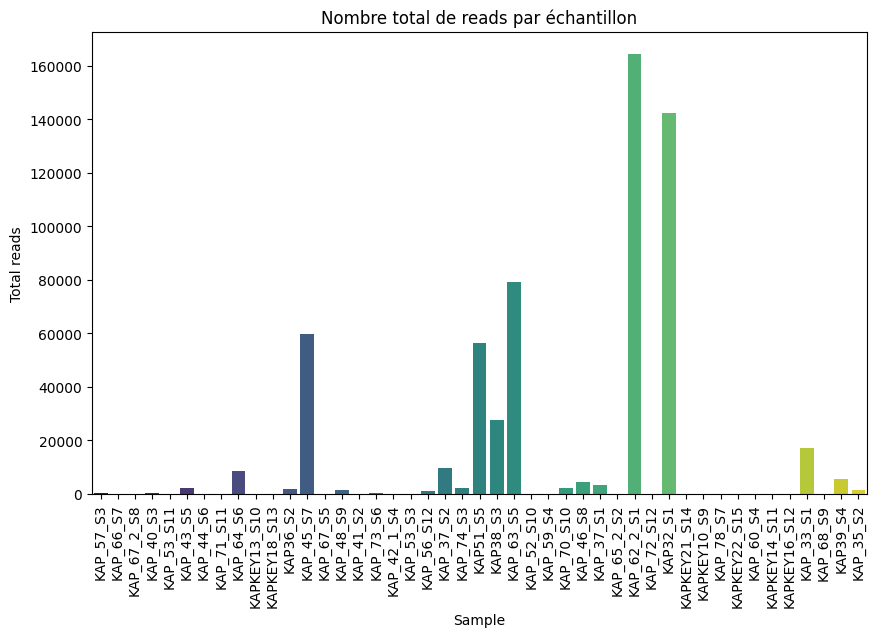

In [20]:

#Tableau : Nombre total de reads par échantillon + Graphique

# total de reads par sample
total_reads_per_sample = df_counts.sum().to_frame(name="Total Reads")
total_reads_per_sample["Moyenne par gène"] = df_counts.mean()
total_reads_per_sample["Médiane par gène"] = df_counts.median()

print("Statistiques par échantillon")
display(total_reads_per_sample.sort_values(by="Total Reads", ascending=False))
#test modifiy os
# Histogramme
plt.figure(figsize=(10,6))
sns.barplot(x=total_reads_per_sample.index, y="Total Reads", data=total_reads_per_sample, palette="viridis")
plt.xticks(rotation=90)
plt.title("Nombre total de reads par échantillon")
plt.xlabel("Sample")
plt.ylabel("Total reads")
print("Histogramme : nombre total de reads par échantillon")
plt.show()

In [19]:
# Dictionnaire : identifiant eeee abréviation/fonction
print("Affichage des gènes présents dans df_counts avec leur abréviation NCBI")
gene_abbr = {
    "HHV8GK18_gp01": "K1",
    "HHV8_gs01": "miscRNA01",
    "HHV8GK18_gp39": "ORF35",
    "HHV8GK18_gp38": "ORF34",
    "HHV8GK18_gp62": "vIRF-1 (K9)",
    "HHV8GK18_gp63": "vIRF-4",
    "HHV8GK18_gp64": "vIRF-3",
    "HHV8GK18_gp65": "vIRF-2",
    "HHV8GK18_gp79": "K12",
    "HHV8_gs02": "miscRNA02",
    "HHV8_gs03": "miscRNA03",
    "HHV8_gs04": "miscRNA04",
    "HHV8_gs05": "miscRNA05",
    "HHV8_gs06": "miscRNA06",
    "HHV8_gs07": "miscRNA07",
    "HHV8_gs08": "miscRNA08",
    "HHV8_gs09": "miscRNA09",
    "HHV8_gs10": "miscRNA10"
}
# Afficher tous les gènes présents dans df_counts avec leur abréviation
gene_table = pd.DataFrame({
    "Geneid": df_counts.index,
    "Abréviation NCBI": [gene_abbr.get(g, "") for g in df_counts.index]
})


display(gene_table)

Affichage des gènes présents dans df_counts avec leur abréviation NCBI


,Geneid,Abréviation NCBI
0,HHV8GK18_gp01,K1
1,HHV8_gs01,miscRNA01
2,HHV8GK18_gp38,ORF34
3,HHV8GK18_gp39,ORF35
4,HHV8GK18_gp62,vIRF-1 (K9)
5,HHV8GK18_gp63,vIRF-4
6,HHV8GK18_gp64,vIRF-3
7,HHV8GK18_gp65,vIRF-2
8,HHV8GK18_gp79,K12
9,HHV8_gs02,miscRNA02



Gènes les plus exprimés :
Geneid
HHV8GK18_gp79    11989.822222
HHV8_gs01          905.866667
HHV8GK18_gp64       32.444444
HHV8GK18_gp65       23.511111
HHV8_gs02           23.444444
HHV8GK18_gp63       20.911111
HHV8_gs06           19.955556
HHV8_gs03           19.111111
HHV8_gs09           15.511111
HHV8_gs04           13.511111
dtype: float64

Heatmap des gènes les plus exprimés (top 20):


<Figure size 1000x800 with 0 Axes>

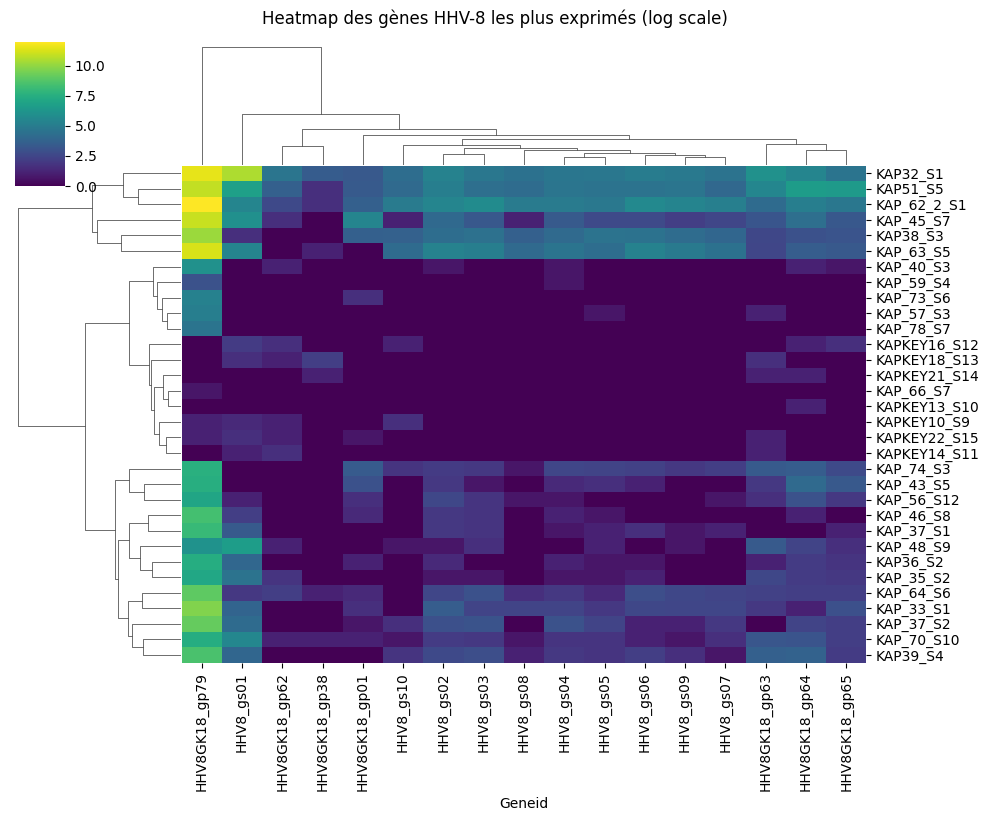


1 gènes sans expression :
['HHV8GK18_gp39']


In [14]:
# Moyenne d'expression par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)
print("\nGènes les plus exprimés :")
print(mean_expression.head(10))


# plot :

df_filtered = df_counts.loc[:, df_counts.sum() > 0]  
df_gene_sorted = df_filtered.T 

top_genes = mean_expression[mean_expression > 0].head(20).index.tolist()
df_top_genes = df_gene_sorted[top_genes]

#heatmap
df_log = df_top_genes.apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10, 8))
sns.clustermap(df_log, cmap="viridis", yticklabels=True, xticklabels=True, annot=False, figsize=(10, 8))
print("\nHeatmap des gènes les plus exprimés (top 20):")
plt.suptitle("Heatmap des gènes HHV-8 les plus exprimés (log scale)", y=1.02)
plt.show()

zero_genes = df_counts[df_counts.sum(axis=1) == 0].index.tolist()
print(f"\n{len(zero_genes)} gènes sans expression :")
print(zero_genes[:10])

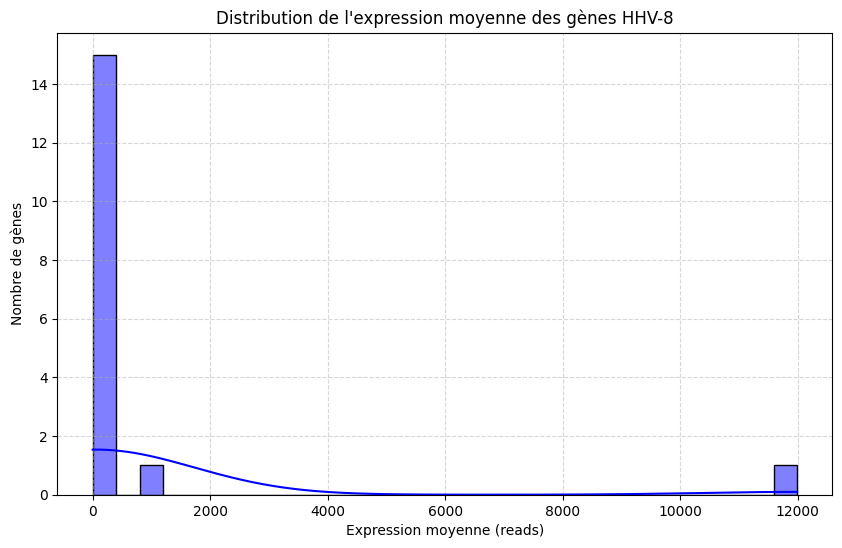

In [15]:
#Histogramme de l'expression moyenne des gènes
# Expression moyenne par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)

mean_expression = mean_expression[mean_expression > 0]

# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(mean_expression, bins=30, kde=True, color='blue')
plt.xlabel("Expression moyenne (reads)")
plt.ylabel("Nombre de gènes")
plt.title("Distribution de l'expression moyenne des gènes HHV-8")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

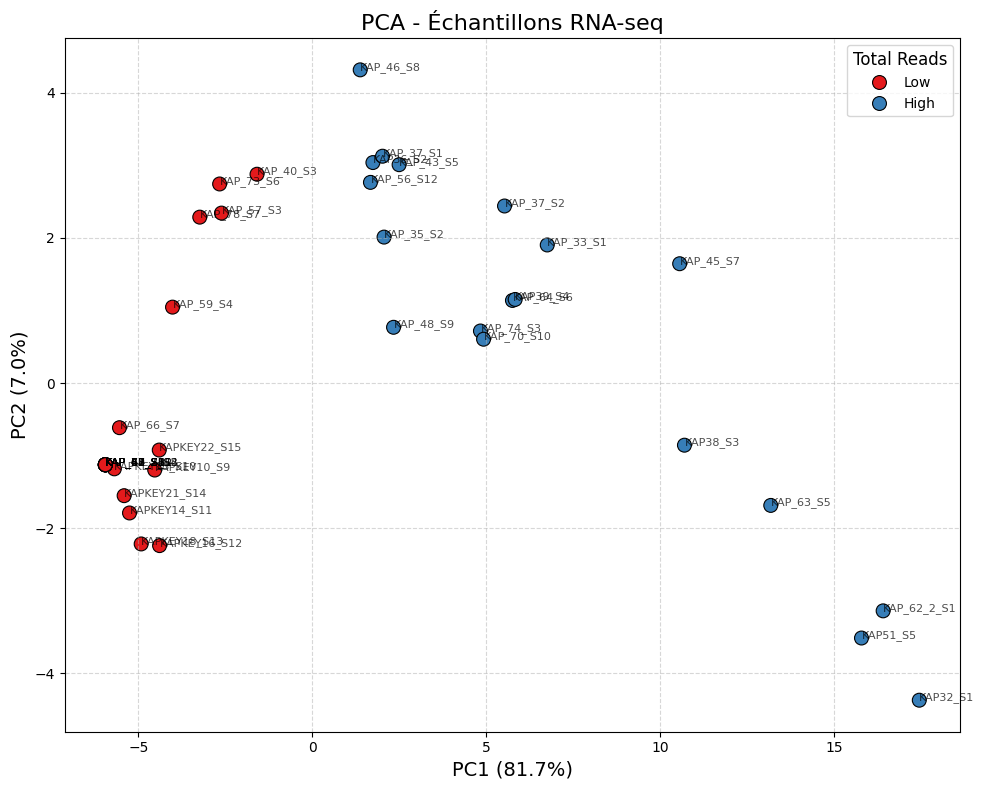

In [18]:
from sklearn.decomposition import PCA
# Pour colorer les échantillons dans le graphe PCA, il faut une variable de groupe/catégorie.
# on va colorer selon si le total de reads est > 1000 ou non 
group = total_reads_per_sample["Total Reads"] > 1000
group = group.map({True: "High", False: "Low"})
log_df = df_counts.apply(lambda x: np.log(x + 1))

# PCA sur log-transformées
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_df.T)

plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=group, palette="Set1", s=100, edgecolor="k")
for i, txt in enumerate(df_counts.columns):
    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]), fontsize=8, alpha=0.7)
plt.title("PCA - Échantillons RNA-seq", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=14)
plt.legend(title="Total Reads", title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#from sklearn.decomposition import PCA

# Log transform
#log_df = df_counts.apply(lambda x: np.log(x + 1))

# PCA
#pca = PCA(n_components=2)
#pca_result = pca.fit_transform(log_df.T)

# Plot 
#plt.figure(figsize=(8,6))
#sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],  color='blue')
#for i, txt in enumerate(df_counts.columns):
#    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]),  fontsize=8)
#plt.title("PCA - Échantillons RNA-seq")
#plt.xlabel("PC1")
#plt.ylabel("PC2")
#plt.grid(True)
#plt.show()